**Кузьменко Сергей, БД-231м**

**Практическая работа 2**

# Парсинг HTML. BeautifulSoup

**Источник:**'https://rosrealt.ru/cena/?t=dinamika'

**Цель работы:** освоение техники парсинга HTML-страниц с помощью
библиотеки BeautifulSoup в языке программирования Python для сбора, консолидации и
аналитической обработки информации.

Сбор и анализ данных об аренде недвижимости

1. Установка необходимых библиотек

In [1]:
!pip install requests beautifulsoup4 pymongo pandas matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 14.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.7/307.7 kB 12.9 MB/s eta 0:00:00


2. Импортирование библиотек

In [2]:
#Импортирование библиотек:
import requests
from bs4 import BeautifulSoup
from pymongo import MongoClient
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

3. Получение HTML-кода страницы

In [3]:
url = 'https://rosrealt.ru/cena/?t=dinamika'
response = requests.get(url)
page_content = response.content

4. Парсинг HTML с помощью BeautifulSoup

In [4]:
soup = BeautifulSoup(page_content, 'html.parser')
heading = soup.find('h2', string = lambda text: "Архив цен на коммерческую недвижимость в России" in text)
table = heading.find_next('table')
rows = table.find_all('tr')

5. Извлечение данных и создание DataFrame

In [5]:
data = []
for row in rows[1:]: # Пропускаем заголовок
    cols = row.find_all('td')
    cols = [ele.text.strip() for ele in cols]
    data.append(cols)
df = pd.DataFrame(data, columns=['Year', 'Office rub/m^2', 'Marketplaces rub/m^2', 'Garages rub/m^2', 'TradePlatforms_rent rub/m^2', 'Office rent rub/m^2'])
df

,Year,Office rub/m^2,Marketplaces rub/m^2,Garages rub/m^2,TradePlatforms_rent rub/m^2,Office rent rub/m^2
0,2009,64 483,65 275,536 285,9 466,9 743
1,2010,64 515,61 329,864 115,6 635,9 014
2,2011,83 302,61 067,1 402 858,7 052,10 525
3,2012,75 857,66 896,1 119 880,7 948,11 252
4,2013,67 916,79 125,438 631,9 589,13 159
5,2014,71 961,106 803,473 139,10 427,15 387
6,2015,76 254,92 134,461 450,9 617,12 820
7,2016,74 532,89 045,450 157,9 654,13 508
8,2017,69 196,123 259,431 073,14 237,14 031
9,2018,77 234,159 014,401 391,15 711,15 385


6. Обработка данных

In [6]:
df['Office rub/m^2'] = df['Office rub/m^2'].str.replace(' ', '')
df['Marketplaces rub/m^2'] = df['Marketplaces rub/m^2'].str.replace(' ', '')
df['Garages rub/m^2'] = df['Garages rub/m^2'].str.replace(' ', '')
df['TradePlatforms_rent rub/m^2'] = df['TradePlatforms_rent rub/m^2'].str.replace(' ', '')
df['Office rent rub/m^2'] = df['Office rent rub/m^2'].str.replace(' ', '')

In [7]:
df['Office rub/m^2'] = df['Office rub/m^2'].astype(int)
df['Marketplaces rub/m^2'] = df['Marketplaces rub/m^2'].astype(int)
df['Garages rub/m^2'] = df['Garages rub/m^2'].astype(int)
df['TradePlatforms_rent rub/m^2'] = df['TradePlatforms_rent rub/m^2'].astype(int)
df['Office rent rub/m^2'] = df['Office rent rub/m^2'].astype(int)

7. Анализ данных

In [9]:
df['Year'] = df['Year'].astype(int)

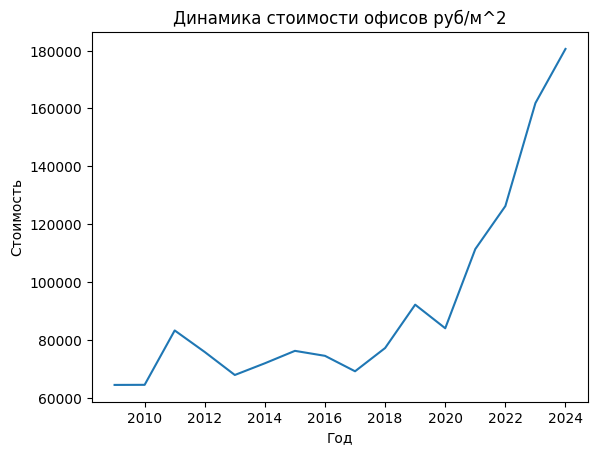

In [10]:
df.plot(kind='line', x='Year', y='Office rub/m^2', legend=False)
plt.title('Динамика стоимости офисов руб/м^2')
plt.xlabel('Год')
plt.ylabel('Стоимость')
plt.show()

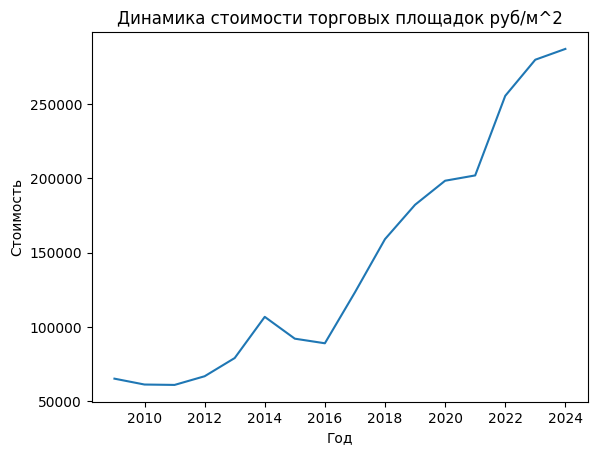

In [11]:
df.plot(kind='line', x='Year', y='Marketplaces rub/m^2', legend=False)
plt.title('Динамика стоимости торговых площадок руб/м^2')
plt.xlabel('Год')
plt.ylabel('Стоимость')
plt.show()

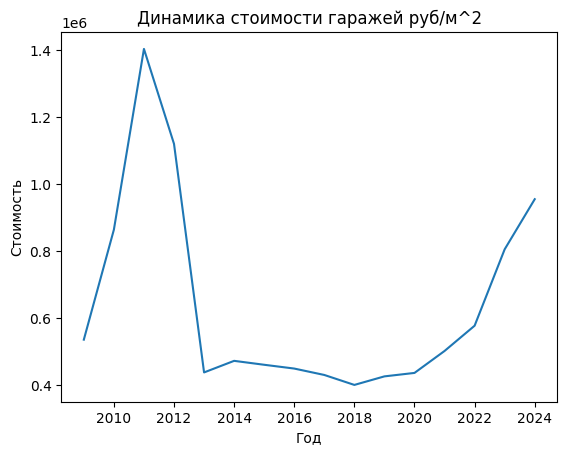

In [12]:
df.plot(kind='line', x='Year', y='Garages rub/m^2', legend=False)
plt.title('Динамика стоимости гаражей руб/м^2')
plt.xlabel('Год')
plt.ylabel('Стоимость')
plt.show()

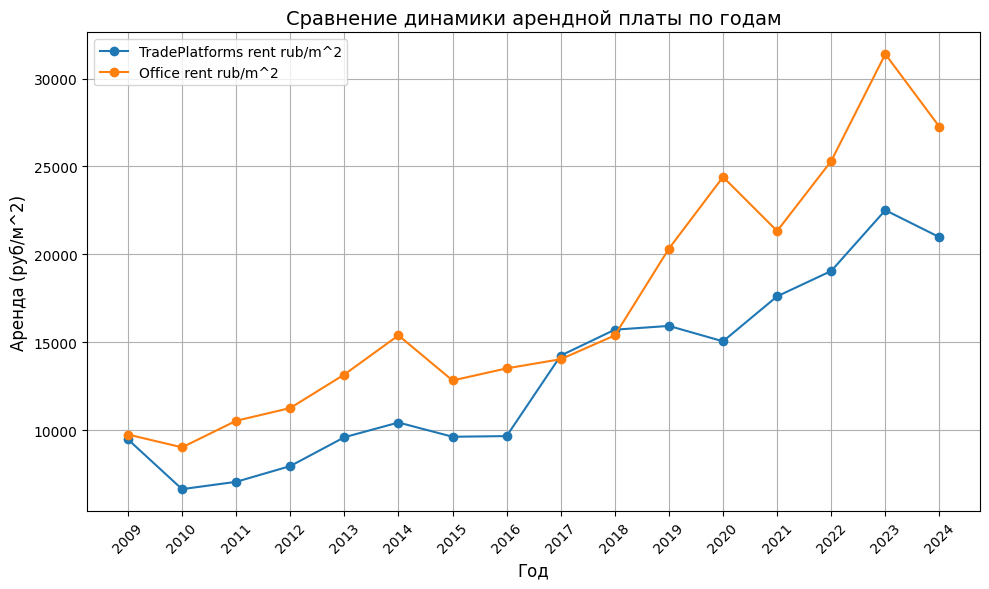

In [14]:
plt.figure(figsize=(10, 6))

# Линия для 'TradePlatforms_rent rub/m^2'
plt.plot(df['Year'], df['TradePlatforms_rent rub/m^2'], label='TradePlatforms rent rub/m^2', marker='o')
# Линия для 'Office rent rub/m^2'
plt.plot(df['Year'], df['Office rent rub/m^2'], label='Office rent rub/m^2', marker='o')

# Настройки графика
plt.title('Сравнение динамики арендной платы по годам', fontsize=14)
plt.xlabel('Год', fontsize=12)
plt.ylabel('Аренда (руб/м^2)', fontsize=12)
plt.legend()
plt.grid(True)
plt.xticks(df['Year'], rotation=45)
plt.tight_layout()

# Отображение графика
plt.show()


**Вывод:** Видно, что в отличии от офисов и гаражей цены на торговые площадки росли равномерно.

Для гаражей и офисов начиная с определенного момента идет резкий рост. Это может быть связано например с резким увеличением спроса.

Цены на аренду офисов всегда выше, чем на торговые площадки. Аренду растут примерно равномерно до 2018. Далее идет резкий рост цен на аренду офисов. Спад в 2021 объясняется ковидом и полярностью удаленной работы, а значит умньшение спроса. Еще более резкий спрос в 2022-2023 связан с большой инфляцией и желанием бизнеса вернуть сотрудников в офис для повышения эффективности работы